In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('titanic.csv')

In [5]:
print(data.sample(5))

     PassengerId  Survived  Pclass  \
339          340         0       1   
328          329         1       3   
291          292         1       1   
503          504         0       3   
136          137         1       1   

                                               Name     Sex   Age  SibSp  \
339                    Blackwell, Mr. Stephen Weart    male  45.0      0   
328  Goldsmith, Mrs. Frank John (Emily Alice Brown)  female  31.0      1   
291         Bishop, Mrs. Dickinson H (Helen Walton)  female  19.0      1   
503                  Laitinen, Miss. Kristina Sofia  female  37.0      0   
136                    Newsom, Miss. Helen Monypeny  female  19.0      0   

     Parch  Ticket     Fare Cabin Embarked  
339      0  113784  35.5000     T        S  
328      1  363291  20.5250   NaN        S  
291      0   11967  91.0792   B49        C  
503      0    4135   9.5875   NaN        S  
136      2   11752  26.2833   D47        S  


In [7]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [11]:
print("\nShape of the Dataset:", data.shape)


Shape of the Dataset: (891, 12)


In [13]:
print("\nDataset Info:\n")
data.info()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
print("\nData Types:\n", data.dtypes)


Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [17]:
print("\nColumn Names:\n", data.columns)


Column Names:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [19]:
print("\nSex Column Value Counts:\n", data["Sex"].value_counts())


Sex Column Value Counts:
 Sex
male      577
female    314
Name: count, dtype: int64


In [21]:
def cat_to_num(value):
    """
    Converts 'Sex' to numeric: 0 for female, 1 for male
    """
    if value == "male":
        return 1
    elif value == "female":
        return 0

data["Sex"] = data["Sex"].apply(cat_to_num)

In [23]:
print("\nAfter Conversion - Sex Column Value Counts:\n", data['Sex'].value_counts())


After Conversion - Sex Column Value Counts:
 Sex
1    577
0    314
Name: count, dtype: int64


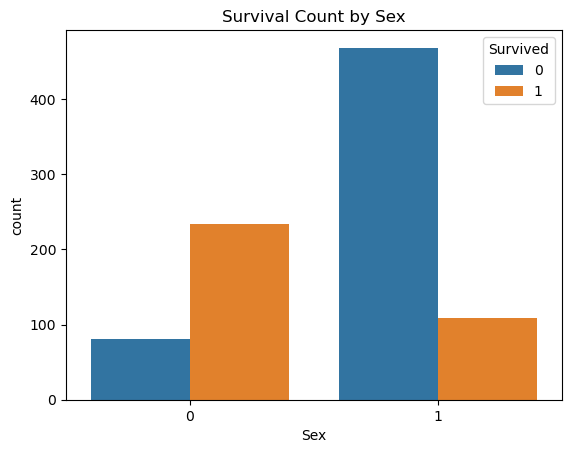

In [25]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()

In [27]:
survived_counts = data[data['Survived'] == 1].groupby('Sex').size()
print(survived_counts)

Sex
0    233
1    109
dtype: int64


In [29]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [31]:
data['Pclass'] = data['Pclass'].astype('category')
data['Survived'] = data['Survived'].astype('category')

In [33]:
data.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

In [37]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [41]:
data['Age_norm'] = (data['Age'] - data['Age'].min()) / (data['Age'].max() - data['Age'].min())
data['Fare_norm'] = (data['Fare'] - data['Fare'].min()) / (data['Fare'].max() - data['Fare'].min())

In [43]:
print(data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_norm',
       'Fare_norm'],
      dtype='object')


In [45]:
print(data.head())

   PassengerId Survived Pclass  \
0            1        0      3   
1            2        1      1   
2            3        1      3   
3            4        1      1   
4            5        0      3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin Embarked  Age_norm  Fare_norm  
0         A/5 21171   7.2500   NaN        S  0.271174   0.014151  
1          PC 17599  71.2833   C85        C  0.472229   0.139136  
2  STON/O2. 3101282   7.9250   NaN        S  0.321438   0.015469  
3            113803  53.1000  C123      

In [47]:
print(data.tail())

     PassengerId Survived Pclass                                      Name  \
886          887        0      2                     Montvila, Rev. Juozas   
887          888        1      1              Graham, Miss. Margaret Edith   
888          889        0      3  Johnston, Miss. Catherine Helen "Carrie"   
889          890        1      1                     Behr, Mr. Karl Howell   
890          891        0      3                       Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch      Ticket   Fare Cabin Embarked  Age_norm  \
886    1  27.000000      0      0      211536  13.00   NaN        S  0.334004   
887    0  19.000000      0      0      112053  30.00   B42        S  0.233476   
888    0  29.699118      1      2  W./C. 6607  23.45   NaN        S  0.367921   
889    1  26.000000      0      0      111369  30.00  C148        C  0.321438   
890    1  32.000000      0      0      370376   7.75   NaN        Q  0.396833   

     Fare_norm  
886   0.025374  
887   0.05

In [49]:
print("\nNormalized Age and Fare Columns:\n", data[['Age_norm', 'Fare_norm']].head())


Normalized Age and Fare Columns:
    Age_norm  Fare_norm
0  0.271174   0.014151
1  0.472229   0.139136
2  0.321438   0.015469
3  0.434531   0.103644
4  0.434531   0.015713
